In [210]:
import pandas as pd
import time
import itertools
import matplotlib.pyplot as plt

import os
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from selenium import webdriver
from bs4 import BeautifulSoup

In [211]:
i30_reply_data = pd.read_csv('../W2/i30_review_comment.csv')
i30_reply_data.columns

Index(['ID', 'text', 'sentiment'], dtype='object')

<Axes: >

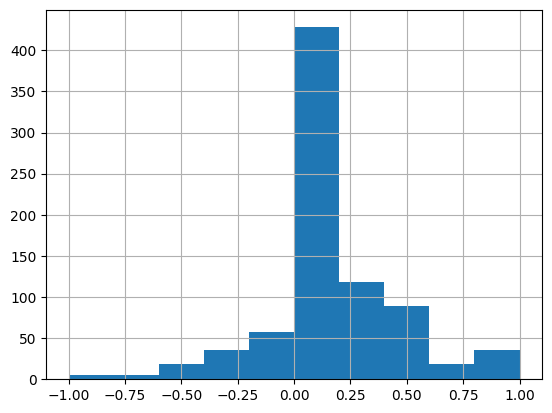

In [212]:
i30_reply_data['sentiment'].hist()

In [213]:
def processing(x):    
    return x.split(' ')

In [214]:
positive_words_series = i30_reply_data.text.loc[i30_reply_data.sentiment > 0.3].apply(processing)
positive_words_2d = positive_words_series.to_list()
positive_words = list(itertools.chain(*positive_words_2d))

In [215]:
negative_words_series = i30_reply_data.text.loc[i30_reply_data.sentiment < -0.3].apply(processing)
negative_words_2d = negative_words_series.to_list()
negative_words = list(itertools.chain(*negative_words_2d))

In [216]:
positive_counts = Counter(positive_words)
# positive_tags = positive_counts.most_common(200) 
positive_dict = dict(positive_counts)

negative_counts = Counter(negative_words)
# negative_tags = negative_counts.most_common(200) 
negative_dict = dict(negative_counts)

In [235]:
intersect_words = list(set(positive_dict.keys())&set(negative_dict.keys()))
positive_counts

Counter({'the': 175,
         'a': 93,
         'I': 73,
         'is': 63,
         'it': 59,
         'in': 44,
         'and': 44,
         'car': 42,
         'to': 40,
         'of': 36,
         'for': 36,
         'this': 32,
         '': 31,
         'that': 29,
         'you': 28,
         'my': 27,
         'but': 26,
         'on': 26,
         'N': 25,
         'best': 23,
         'better': 22,
         'Hyundai': 21,
         'than': 21,
         'love': 20,
         'more': 20,
         'with': 19,
         'have': 17,
         'so': 15,
         'good': 14,
         'one': 14,
         'was': 14,
         'just': 14,
         'hot': 14,
         'or': 14,
         'The': 14,
         'review': 13,
         'be': 13,
         'looks': 13,
         'hatch': 12,
         'would': 12,
         'as': 11,
         'like': 11,
         'great': 11,
         "it's": 11,
         'are': 11,
         'cars': 11,
         'how': 10,
         'see': 10,
         'at': 10,
         

In [236]:
print(intersect_words)
for word in intersect_words:
    try:
        positive_dict.pop(word)
        negative_dict.pop(word)       
    except:
        pass

['', 'absolutely', 'design', 'What', "doesn't", 'this', 'Don’t', 'not', 'how', 'Hyundai', 'make', 'would', '2', 'The', '-', 'on', 'even', 'why', 'but', 'review', 'GTI', 'wish', 'get', 'roads', 'lot', 'less', 'are', 'you', 'manual', 'This', '0-60', 'video!', 'disagree', 'So', 'just', 'I', "That's", 'Would', 'than', 'i30', 'value', 'hell', 'need', 'with', 'u', 'some', 'be', 'has', 'want', 'don’t', 'can', 'if', 'from', 'We', 'these', 'and', 'their', 'dct', 'looks', 'never', 'still', 'i30N', 'was', 'N,', 'Kona', 'too', 'Elantra', 'very', 'your', 'gear', 'a', 'really', 'seem', 'an', 'to', 'drive', 'version', 'economy', 'A', 'could', 'Too', 'no', 'Amazing', 'as', 'for', '6', 'off', '6.25', 'Veloster', 'over', 'much', 'me', 'which', 'system', 'buying', 'after', 'car', 'up', 'type', 'one', 'then', 'front', 'didnt', 'that', 'makes', 'piston', 'my', 'Civic', 'Not', 'making', 'year', 'have', 'That', 'so', 'You', 'they', 'little', 'hatchback', 'is', 'myself', 'drove', 'in', 'US', "Don't", 'seconds

In [237]:
positive_wc = WordCloud(background_color="white", max_font_size=60)
positive_cloud = positive_wc.generate_from_frequencies(positive_dict)
negative_wc = WordCloud(background_color="white", max_font_size=60)
negative_cloud = negative_wc.generate_from_frequencies(negative_dict)

Text(0.5, 1.0, 'Negative YouTube Word Cloud')

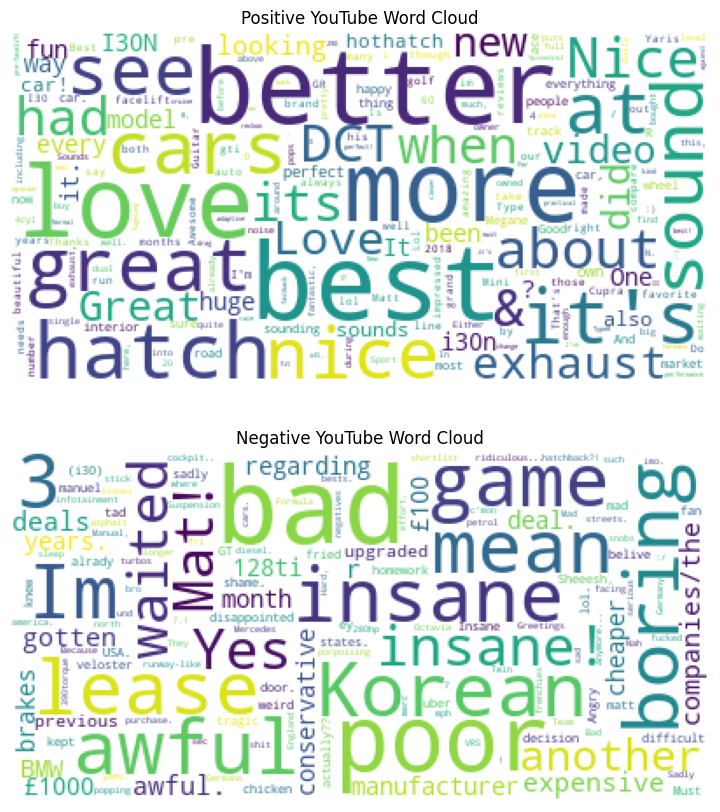

In [251]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xticks([], [])
plt.yticks([], [])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.imshow(positive_cloud)
plt.title('Positive YouTube Word Cloud')

plt.subplot(212)
plt.xticks([], [])
plt.yticks([], [])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.imshow(negative_cloud)
plt.title('Negative YouTube Word Cloud')
